In [1]:
import gzip
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:

gz_file_path = 'QUOT_SIM2_latest-20240201-20240327.csv.gz'
# The path for the new CSV file you want to create
csv_file_path = '20240201-20240327.csv'

# Open the .gz file in text read mode ('rt')
with gzip.open(gz_file_path, 'rt') as gz_file:
    # Open the CSV file for writing
    with open(csv_file_path, 'w', newline='') as csv_file:
        # Create a CSV writer object
        writer = csv.writer(csv_file)

        # Assuming each line in the .gz file is a CSV row
        for line in gz_file:
            # Split the line into a list at the comma
            # This assumes a simple CSV structure without quoted commas
            # For more complex parsing, consider using csv.reader on the gz_file object
            row = line.strip().split(',')
            
            # Write the row to the CSV file
            writer.writerow(row)


In [3]:
csv_file_path = '2020-202402.csv'

with open(csv_file_path, newline='') as csv_file:
    reader = csv.reader(csv_file)
    
    # Fetch the header row
    header = next(reader)
    print('Headers:', header)
    
    # Print a few data rows for example
    print('Sample Data Rows:')
    for _ in range(5):  # Adjust number to print more or fewer rows
        try:
            print(next(reader))
        except StopIteration:
            break  # Stop if there are less than 5 rows of data


Headers: ['LAMBX;LAMBY;DATE;PRENEI_Q;PRELIQ_Q;T_Q;FF_Q;Q_Q;DLI_Q;SSI_Q;HU_Q;EVAP_Q;ETP_Q;PE_Q;SWI_Q;DRAINC_Q;RUNC_Q;RESR_NEIGE_Q;RESR_NEIGE6_Q;HTEURNEIGE_Q;HTEURNEIGE6_Q;HTEURNEIGEX_Q;SNOW_FRAC_Q;ECOULEMENT_Q;WG_RACINE_Q;WGI_RACINE_Q;TINF_H_Q;TSUP_H_Q']
Sample Data Rows:
['600;24010;20200101;0.0;0.4;9.9;2.1;7.414;3161.6;111.1;98.4;0.1;0.3;0.3;0.940;2.2;0.1;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.315;0.000;9.5;10.9']
['600;24010;20200102;0.0;0.6;11.3;5.5;7.396;2955.5;55.2;89.8;0.7;0.4;-0.1;0.933;2.0;0.0;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.314;0.000;9.5;11.9']
['600;24010;20200103;0.0;0.8;9.6;6.1;6.458;3066.2;56.5;87.2;1.0;0.7;-0.2;0.926;1.9;0.1;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.313;0.000;8.8;10.6']
['600;24010;20200104;0.0;0.0;8.1;2.7;5.230;2564.4;142.7;78.8;0.1;0.8;-0.1;0.919;1.8;0.0;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.312;0.000;5.4;10.2']
['600;24010;20200105;0.0;0.0;7.2;3.3;5.125;2774.9;115.8;81.9;0.3;1.1;-0.3;0.912;1.7;0.0;0.0;0.0;0.000;0.000;0.000;0.0;0.0;0.311;0.000;7.6;8.8']


In [28]:
csv_file_path = '2010-2019.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df1.head()


,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20100101,0.4,0.0,4.3,5.0,4.042,2718.0,310.1,...,0.0,0.001,0.000,0.000,0.0,0.1,0.322,0.0,3.3,5.7
1,600,24010,20100102,0.0,0.2,2.2,2.6,3.324,2347.9,489.5,...,0.3,0.000,0.002,0.003,0.0,0.3,0.320,0.0,-1.0,5.5
2,600,24010,20100103,0.0,0.0,3.9,5.9,3.485,2443.2,115.6,...,0.0,0.000,0.000,0.000,0.0,0.0,0.319,0.0,2.4,4.7
3,600,24010,20100104,0.0,0.0,1.6,4.6,2.976,2243.8,613.2,...,0.0,0.000,0.000,0.000,0.0,0.0,0.317,0.0,1.0,3.6
4,600,24010,20100105,0.0,4.4,1.9,3.7,3.595,2593.9,199.3,...,0.0,0.000,0.000,0.000,0.0,0.0,0.315,0.0,-0.2,3.4


In [29]:
csv_file_path = '2020-202402.csv'

# Read the CSV file into a DataFrame
df2 = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df2.head()

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20200101,0.0,0.4,9.9,2.1,7.414,3161.6,111.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.315,0.0,9.5,10.9
1,600,24010,20200102,0.0,0.6,11.3,5.5,7.396,2955.5,55.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.314,0.0,9.5,11.9
2,600,24010,20200103,0.0,0.8,9.6,6.1,6.458,3066.2,56.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.313,0.0,8.8,10.6
3,600,24010,20200104,0.0,0.0,8.1,2.7,5.230,2564.4,142.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.312,0.0,5.4,10.2
4,600,24010,20200105,0.0,0.0,7.2,3.3,5.125,2774.9,115.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.311,0.0,7.6,8.8


In [30]:
csv_file_path = '20240201-20240327.csv'

# Read the CSV file into a DataFrame
df3 = pd.read_csv(csv_file_path, delimiter=';')

# Display the first few rows of the DataFrame to verify it's loaded correctly
df3.head()

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20240201,0.0,1.0,10.8,3.4,7.850,3232.8,136.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.307,0.0,9.7,11.8
1,600,24010,20240202,0.0,0.6,10.5,3.6,7.729,3171.3,135.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.307,0.0,9.7,11.4
2,600,24010,20240203,0.0,0.8,10.5,3.1,7.466,3079.2,234.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306,0.0,9.8,11.1
3,600,24010,20240204,0.0,0.5,10.4,4.0,6.754,3051.1,158.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.306,0.0,10.2,11.1
4,600,24010,20240205,0.0,0.4,10.6,4.4,6.989,3050.7,161.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.305,0.0,9.4,11.9


In [31]:

df = pd.concat([df1, df2, df3], axis=0)

# Réinitialiser l'index pour éviter les index dupliqués
df.reset_index(drop=True, inplace=True)
df

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,FF_Q,Q_Q,DLI_Q,SSI_Q,...,RESR_NEIGE6_Q,HTEURNEIGE_Q,HTEURNEIGE6_Q,HTEURNEIGEX_Q,SNOW_FRAC_Q,ECOULEMENT_Q,WG_RACINE_Q,WGI_RACINE_Q,TINF_H_Q,TSUP_H_Q
0,600,24010,20100101,0.4,0.0,4.3,5.0,4.042,2718.0,310.1,...,0.0,0.001,0.000,0.000,0.0,0.1,0.322,0.0,3.3,5.7
1,600,24010,20100102,0.0,0.2,2.2,2.6,3.324,2347.9,489.5,...,0.3,0.000,0.002,0.003,0.0,0.3,0.320,0.0,-1.0,5.5
2,600,24010,20100103,0.0,0.0,3.9,5.9,3.485,2443.2,115.6,...,0.0,0.000,0.000,0.000,0.0,0.0,0.319,0.0,2.4,4.7
3,600,24010,20100104,0.0,0.0,1.6,4.6,2.976,2243.8,613.2,...,0.0,0.000,0.000,0.000,0.0,0.0,0.317,0.0,1.0,3.6
4,600,24010,20100105,0.0,4.4,1.9,3.7,3.595,2593.9,199.3,...,0.0,0.000,0.000,0.000,0.0,0.0,0.315,0.0,-0.2,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51725263,11960,17450,20240323,0.0,0.2,13.1,2.0,6.968,2747.3,2148.8,...,0.0,0.000,0.000,0.000,0.0,0.0,0.262,0.0,10.2,17.8
51725264,11960,17450,20240324,0.0,0.0,13.2,2.5,5.998,2553.1,1485.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.261,0.0,11.1,17.1
51725265,11960,17450,20240325,0.0,2.3,11.3,3.1,5.716,2643.1,1639.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.260,0.0,5.5,17.7
51725266,11960,17450,20240326,0.0,7.8,12.3,2.6,8.029,3186.3,423.6,...,0.0,0.000,0.000,0.000,0.0,0.0,0.259,0.0,9.4,13.3


#### Check for Missing Values

In [32]:

# Check for missing values in each column
missing_values = df.isna().sum()
print(missing_values)


LAMBX            0
LAMBY            0
DATE             0
PRENEI_Q         0
PRELIQ_Q         0
T_Q              0
FF_Q             0
Q_Q              0
DLI_Q            0
SSI_Q            0
HU_Q             0
EVAP_Q           0
ETP_Q            0
PE_Q             0
SWI_Q            0
DRAINC_Q         0
RUNC_Q           0
RESR_NEIGE_Q     0
RESR_NEIGE6_Q    0
HTEURNEIGE_Q     0
HTEURNEIGE6_Q    0
HTEURNEIGEX_Q    0
SNOW_FRAC_Q      0
ECOULEMENT_Q     0
WG_RACINE_Q      0
WGI_RACINE_Q     0
TINF_H_Q         0
TSUP_H_Q         0
dtype: int64


In [33]:
# Sélectionnez seulement les colonnes nécessaires
df = df[["LAMBX", "LAMBY", "DATE", "PRENEI_Q", "PRELIQ_Q", "T_Q", "TINF_H_Q", "TSUP_H_Q"]]

In [34]:
df.dtypes

LAMBX         int64
LAMBY         int64
DATE          int64
PRENEI_Q    float64
PRELIQ_Q    float64
T_Q         float64
TINF_H_Q    float64
TSUP_H_Q    float64
dtype: object

In [35]:
# # Convertir les colonnes en types de données qui utilisent moins de mémoire
# df.loc[:,'LAMBX'] = df['LAMBX'].astype('int32')
# df.loc[:,'LAMBY'] = df['LAMBY'].astype('int32')
# df.loc[:,'PRENEI_Q'] = df['PRENEI_Q'].astype('float32')
# df.loc[:,'PRELIQ_Q'] = df['PRELIQ_Q'].astype('float32')
# df.loc[:, 'T_Q'] = df['T_Q'].astype('float32')
# df.loc[:, 'TINF_H_Q'] = df['TINF_H_Q'].astype('float32')
# df.loc[:, 'TSUP_H_Q'] = df['TSUP_H_Q'].astype('float32')

df['LAMBX'] = df['LAMBX'].astype('int32')
df['LAMBY'] = df['LAMBY'].astype('int32')
df['PRENEI_Q'] = df['PRENEI_Q'].astype('float32')
df['PRELIQ_Q'] = df['PRELIQ_Q'].astype('float32')
df['T_Q'] = df['T_Q'].astype('float32')
df['TINF_H_Q'] = df['TINF_H_Q'].astype('float32')
df['TSUP_H_Q'] = df['TSUP_H_Q'].astype('float32')


C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\2898851072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAMBX'] = df['LAMBX'].astype('int32')
C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\2898851072.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAMBY'] = df['LAMBY'].astype('int32')
C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\2898851072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [36]:
df.dtypes

LAMBX         int32
LAMBY         int32
DATE          int64
PRENEI_Q    float32
PRELIQ_Q    float32
T_Q         float32
TINF_H_Q    float32
TSUP_H_Q    float32
dtype: object

In [37]:
# Ensure the DATE column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Function to filter data for the same day and month across all years
def filter_by_date(df, month, day):
    return df[(df['DATE'].dt.month == month) & (df['DATE'].dt.day == day)]

df.loc[:, 'Month'] = df['DATE'].dt.month
df.loc[:, 'Day'] = df['DATE'].dt.day
df

C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\1441059409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\1441059409.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Month'] = df['DATE'].dt.month
C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\1441059409.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

,LAMBX,LAMBY,DATE,PRENEI_Q,PRELIQ_Q,T_Q,TINF_H_Q,TSUP_H_Q,Month,Day
0,600,24010,2010-01-01,0.4,0.0,4.3,3.3,5.700000,1,1
1,600,24010,2010-01-02,0.0,0.2,2.2,-1.0,5.500000,1,2
2,600,24010,2010-01-03,0.0,0.0,3.9,2.4,4.700000,1,3
3,600,24010,2010-01-04,0.0,0.0,1.6,1.0,3.600000,1,4
4,600,24010,2010-01-05,0.0,4.4,1.9,-0.2,3.400000,1,5
...,...,...,...,...,...,...,...,...,...,...
51725263,11960,17450,2024-03-23,0.0,0.2,13.1,10.2,17.799999,3,23
51725264,11960,17450,2024-03-24,0.0,0.0,13.2,11.1,17.100000,3,24
51725265,11960,17450,2024-03-25,0.0,2.3,11.3,5.5,17.700001,3,25
51725266,11960,17450,2024-03-26,0.0,7.8,12.3,9.4,13.300000,3,26


In [38]:
# Groupement par mois et jour, puis calcul de la moyenne de la température pour chaque groupe
avg_temp_per_day = df.groupby(['Month', 'Day'])['T_Q'].mean().reset_index()

# Assurez-vous que DATE est au format datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Calculez la moyenne quotidienne de la température pour la France
avg_daily_temp_france = df.groupby(['DATE'])['T_Q'].mean().reset_index()

# Renommez la colonne de moyenne pour clarifier
avg_daily_temp_france.rename(columns={'T_Q': 'T_Q_Moyenne'}, inplace=True)
avg_daily_temp_france

C:\Users\w130156\AppData\Local\Temp\ipykernel_10836\660512373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')


,DATE,T_Q_Moyenne
0,2010-01-01,1.796088
1,2010-01-02,-1.219571
2,2010-01-03,-0.834816
3,2010-01-04,-1.809765
4,2010-01-05,-2.438769
...,...,...
5195,2024-03-23,7.739952
5196,2024-03-24,6.134452
5197,2024-03-25,7.071613
5198,2024-03-26,7.653346


In [39]:
from sklearn.ensemble import IsolationForest

# Prepare data
data = avg_daily_temp_france[['T_Q_Moyenne']].values

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.009, random_state=42)
iso_forest.fit(data)

# Predict anomalies
preds = iso_forest.predict(data)

# Add predictions to the DataFrame
avg_daily_temp_france['Anomaly'] = preds

# Filter out the anomalies
anomalies = avg_daily_temp_france[avg_daily_temp_france['Anomaly'] == -1]

# Display anomalies with their corresponding date
if not anomalies.empty:
    print("Detected Anomalies:")
    for index, row in anomalies.iterrows():
        print(f"Date: {row['DATE'].date()}, Temperature: {row['T_Q_Moyenne']}")
else:
    print("No significant anomalies detected.")


Detected Anomalies:
Date: 2010-01-08, Temperature: -3.365921974182129
Date: 2010-01-09, Temperature: -4.087545394897461
Date: 2010-01-10, Temperature: -3.462353467941284
Date: 2010-01-11, Temperature: -3.2678627967834473
Date: 2010-02-11, Temperature: -4.642357349395752
Date: 2010-02-12, Temperature: -3.528244972229004
Date: 2010-02-13, Temperature: -3.4584109783172607
Date: 2010-02-14, Temperature: -3.158097505569458
Date: 2010-12-03, Temperature: -3.2704405784606934
Date: 2010-12-15, Temperature: -3.5385866165161133
Date: 2010-12-25, Temperature: -3.2974929809570312
Date: 2010-12-26, Temperature: -4.320188045501709
Date: 2012-02-01, Temperature: -3.576658010482788
Date: 2012-02-02, Temperature: -5.757551670074463
Date: 2012-02-03, Temperature: -7.104912757873535
Date: 2012-02-04, Temperature: -7.291285514831543
Date: 2012-02-05, Temperature: -6.718084812164307
Date: 2012-02-06, Temperature: -6.134927272796631
Date: 2012-02-07, Temperature: -7.454660415649414
Date: 2012-02-08, Tempera

In [40]:
avg_daily_temp_france = avg_daily_temp_france.reset_index()

In [41]:
avg_daily_temp_france

,index,DATE,T_Q_Moyenne,Anomaly
0,0,2010-01-01,1.796088,1
1,1,2010-01-02,-1.219571,1
2,2,2010-01-03,-0.834816,1
3,3,2010-01-04,-1.809765,1
4,4,2010-01-05,-2.438769,1
...,...,...,...,...
5195,5195,2024-03-23,7.739952,1
5196,5196,2024-03-24,6.134452,1
5197,5197,2024-03-25,7.071613,1
5198,5198,2024-03-26,7.653346,1


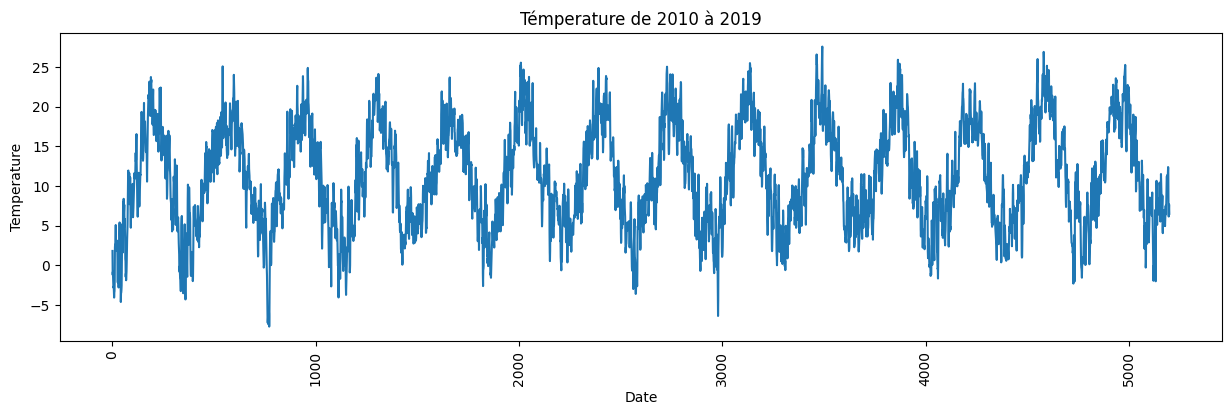

In [42]:
plt.figure(figsize=(15,4))
plt.plot(avg_daily_temp_france['T_Q_Moyenne'])
plt.gca().set(title='Témperature de 2010 à 2019', xlabel='Date', ylabel='Temperature')
plt.xticks(rotation=90)
plt.show()

In [43]:
additive_decomposition = seasonal_decompose(avg_daily_temp_france['T_Q_Moyenne'], model='additive', period=365)

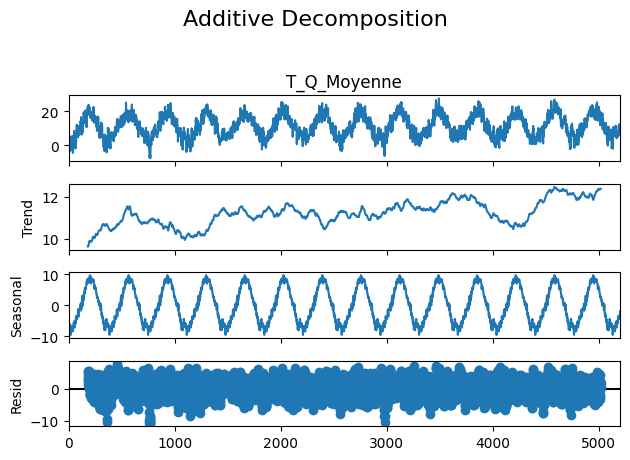

In [44]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [45]:
train_df = avg_daily_temp_france.iloc[0:5200]
X_train = train_df['T_Q_Moyenne']

test_df = avg_daily_temp_france.iloc[5000:5200]
X_test = test_df['T_Q_Moyenne']

Plotting AR model


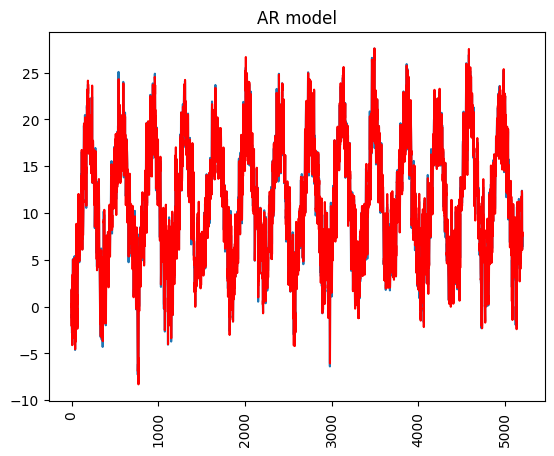

In [46]:
#AR MODEL

model_AR = ARIMA(X_train, order=(2, 1, 0)) 
results_AR = model_AR.fit()  
plt.plot(train_df['T_Q_Moyenne'])
plt.plot(results_AR.fittedvalues, color='red')
plt.xticks(rotation=90)
plt.title('AR model')
print('Plotting AR model')


C:\Users\w130156\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\w130156\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\w130156\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\w130156\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\

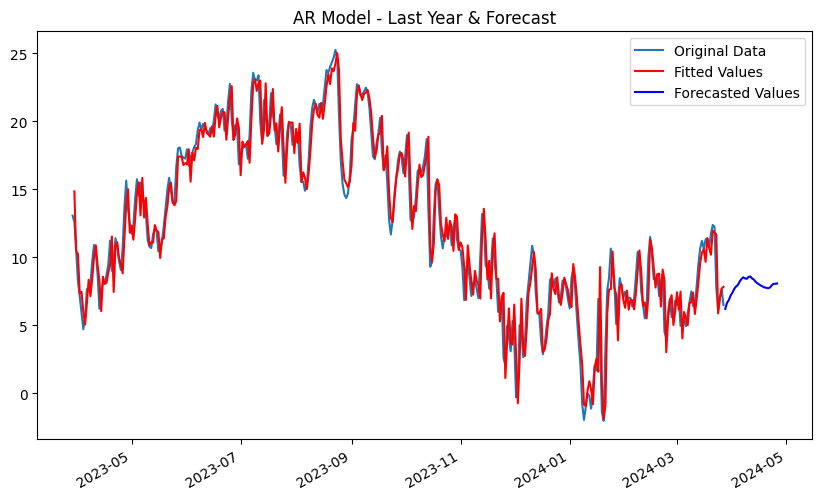

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Ensure DATE column is of datetime type and set it as the index if it's not already
avg_daily_temp_france['DATE'] = pd.to_datetime(avg_daily_temp_france['DATE'])
if avg_daily_temp_france.index.name != 'DATE':
    avg_daily_temp_france.set_index('DATE', inplace=True)

train_df = avg_daily_temp_france.iloc[0:5200]
X_train = train_df['T_Q_Moyenne']

model_AR = ARIMA(X_train, order=(30, 1, 1))
results_AR = model_AR.fit()

# Predict the next 30 days
forecast_steps = 30
forecast = results_AR.forecast(steps=forecast_steps)

# Get the last date from the training data and generate forecast dates
last_date = train_df.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1)[1:]

# Prepare the last 365 days of data for plotting, including using the 'DATE' column
last_365_days = train_df[-365:]

plt.figure(figsize=(10, 6))

# Plot the last 365 days of original data
plt.plot(last_365_days.index, last_365_days['T_Q_Moyenne'], label='Original Data')

# Plot the fitted values (skipping the first due to differencing)
fitted_series = pd.Series(results_AR.fittedvalues, index=last_365_days.index[1:])
plt.plot(fitted_series.index, fitted_series, color='red', label='Fitted Values')

# Plot the forecasted values
plt.plot(forecast_dates, forecast, color='blue', label='Forecasted Values')

# Format the x-axis to show the date properly if displaying time
plt.gcf().autofmt_xdate() # Auto-format date for better readability
plt.title('AR Model - Last Year & Forecast')
plt.legend()
plt.show()


In [49]:
rmse = sqrt(mean_squared_error(train_df['T_Q_Moyenne'], results_AR.fittedvalues))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.399
